# Explore here

In [14]:
# Your code here
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from keras.preprocessing import image

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


import warnings

In [15]:
warnings.filterwarnings("ignore")

In [16]:
import os
test_dir = '../data/raw/test'
print(os.path.exists(test_dir))

True


Imágenes de perros

Imágenes encontradas: 12500
Cargando imagen: ../data/raw/train/dog/dog.675.jpg
Cargando imagen: ../data/raw/train/dog/dog.101.jpg
Cargando imagen: ../data/raw/train/dog/dog.6954.jpg
Cargando imagen: ../data/raw/train/dog/dog.2422.jpg
Cargando imagen: ../data/raw/train/dog/dog.1745.jpg
Cargando imagen: ../data/raw/train/dog/dog.1446.jpg
Cargando imagen: ../data/raw/train/dog/dog.5848.jpg
Cargando imagen: ../data/raw/train/dog/dog.5752.jpg
Cargando imagen: ../data/raw/train/dog/dog.5739.jpg


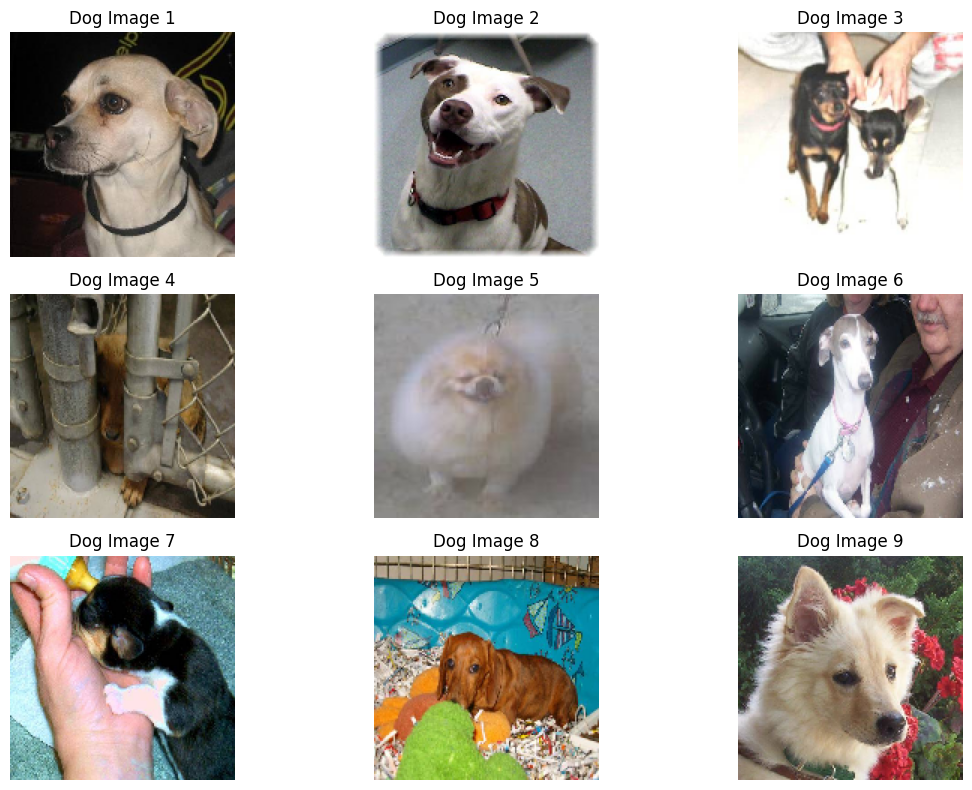

In [17]:
# Ruta al subdirectorio con imágenes de perros
dog_dir = "../data/raw/train/dog"

# Obtener una lista de los archivos de imagen
dog_image_files = [f for f in os.listdir(dog_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Verificar si se encontraron imágenes
print(f"Imágenes encontradas: {len(dog_image_files)}")

# Cargar las primeras 9 imágenes
dog_images = []
for i in range(min(9, len(dog_image_files))):
    img_path = os.path.join(dog_dir, dog_image_files[i])

    if os.path.isfile(img_path):  # Verifica que sea un archivo
        print(f"Cargando imagen: {img_path}")
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img) / 255.0
        dog_images.append(img_array)
    else:
        print(f"No es un archivo válido: {img_path}")

# Crear una figura para mostrar las imágenes
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    if i < len(dog_images):
        ax.imshow(dog_images[i])
        ax.set_title(f'Dog Image {i + 1}')
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

Imágenes de gatos

Imágenes encontradas: 12500
Cargando imagen: ../data/raw/train/cat/cat.2855.jpg
Cargando imagen: ../data/raw/train/cat/cat.3374.jpg
Cargando imagen: ../data/raw/train/cat/cat.7348.jpg
Cargando imagen: ../data/raw/train/cat/cat.8800.jpg
Cargando imagen: ../data/raw/train/cat/cat.5366.jpg
Cargando imagen: ../data/raw/train/cat/cat.7926.jpg
Cargando imagen: ../data/raw/train/cat/cat.918.jpg
Cargando imagen: ../data/raw/train/cat/cat.6734.jpg
Cargando imagen: ../data/raw/train/cat/cat.3401.jpg


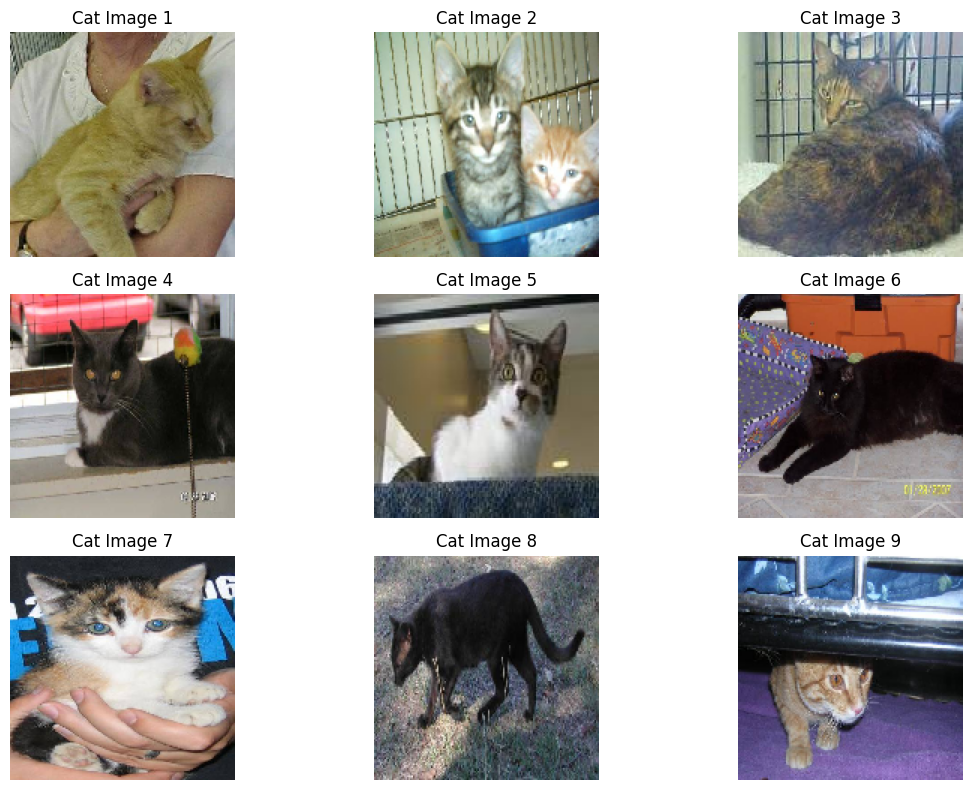

In [18]:
# Ruta al subdirectorio con imágenes de gatos
cat_dir = "../data/raw/train/cat"

# Obtener una lista de los archivos de imagen
cat_image_files = [f for f in os.listdir(cat_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Verificar si se encontraron imágenes
print(f"Imágenes encontradas: {len(cat_image_files)}")

# Cargar las primeras 9 imágenes
cat_images = []
for i in range(min(9, len(cat_image_files))):
    img_path = os.path.join(cat_dir, cat_image_files[i])

    if os.path.isfile(img_path):  # Verifica que sea un archivo
        print(f"Cargando imagen: {img_path}")
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img) / 255.0
        cat_images.append(img_array)
    else:
        print(f"No es un archivo válido: {img_path}")

# Crear una figura para mostrar las imágenes
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    if i < len(cat_images):
        ax.imshow(cat_images[i])
        ax.set_title(f'Cat Image {i + 1}')
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "../data/raw/train"
test_dir = "../data/raw/test"
img_dimensions = (128, 128)

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=img_dimensions,
    classes=["dog", "cat"],
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=img_dimensions,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPool2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # 2 clases: gato y perro
])

2025-06-24 18:03:40.298706: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [21]:
import shutil

train_dir = "../data/raw/train"
dog_dir = os.path.join(train_dir, "dog")
cat_dir = os.path.join(train_dir, "cat")

os.makedirs(dog_dir, exist_ok=True)
os.makedirs(cat_dir, exist_ok=True)

for filename in os.listdir(train_dir):
    if filename.startswith("dog"):
        shutil.move(os.path.join(train_dir, filename), dog_dir)
    elif filename.startswith("cat"):
        shutil.move(os.path.join(train_dir, filename), cat_dir)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "../data/raw/train"
image_size = (128, 128)
batch_size = 8  # más bajo para evitar bloqueo

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [23]:
from keras.optimizers import Adam

# Compilar el modelo antes del entrenamiento
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

He simplificado el modelo porque no me funcionaba kernel debido a la complejidad de la estructura del modelo planteada en el ejercicio

In [24]:
model.fit(
    train_generator,
    epochs=2,
    validation_data=validation_generator
)

Epoch 1/2
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 231s 92ms/step - accuracy: 0.5858 - loss: 0.6865 - val_accuracy: 0.6824 - val_loss: 0.5892
Epoch 2/2
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 255s 89ms/step - accuracy: 0.7284 - loss: 0.5394 - val_accuracy: 0.7644 - val_loss: 0.4850


In [25]:
model.save('modelo_gatos_perros.h5')

Cargar modelo

In [26]:
from tensorflow.keras.models import load_model

modelo_cargado = load_model('modelo_gatos_perros.h5')

In [27]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_generator, steps_per_epoch = 100, validation_data = test_generator, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.7719 - loss: 0.4327
Epoch 1: val_accuracy improved from -inf to 0.26562, saving model to ../models/vgg16_1.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - accuracy: 0.7721 - loss: 0.4328 - val_accuracy: 0.2656 - val_loss: 428.1995
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8244 - loss: 0.3856
Epoch 2: val_accuracy improved from 0.26562 to 0.28125, saving model to ../models/vgg16_1.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.8243 - loss: 0.3858 - val_accuracy: 0.2812 - val_loss: 401.7914
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.8090 - loss: 0.4103
Epoch 3: val_accuracy improved from 0.28125 to 0.37187, saving model to ../models/vgg16_1.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.8090 - loss: 0.4105 - val_accuracy: 0.3719 - val_loss: 427.5838


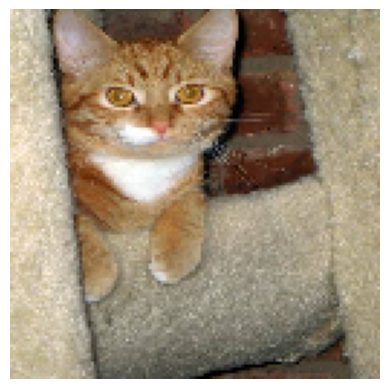

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
cat


In [ ]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np

# Cargar y preprocesar la imagen
img = image.load_img("../data/raw/test/test/15.jpg", target_size=(128, 128))
img = np.asarray(img).astype("float32") / 255.0
plt.imshow(img)
plt.axis('off')
plt.show()

# Expandir dimensión para batch
img = np.expand_dims(img, axis=0)

# Cargar modelo y predecir
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)

# Mostrar resultado
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")
    